In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import collections
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.cluster import KMeans
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("reuters")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/IMamazing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/IMamazing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/IMamazing/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/IMamazing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.corpus import reuters as corpus

In [4]:
for n,item in enumerate(corpus.words(corpus.fileids()[0])[400:600]):
    print(item, end=" ")
    if (n%25) ==24:
      print(" ")

of U . S . Products , if we want to defuse problems from possible U . S . Retaliation ," said Paul Sheen ,  
chairman of textile exporters & lt ; Taiwan Safe Group >. A senior official of South Korea ' s trade promotion association said the trade  
dispute between the U . S . And Japan might also lead to pressure on South Korea , whose chief exports are similar to those  
of Japan . Last year South Korea had a trade surplus of 7 . 1 billion dlrs with the U . S ., Up from  
4 . 9 billion dlrs in 1985 . In Malaysia , trade officers and businessmen said tough curbs against Japan might allow hard - hit  
producers of semiconductors in third countries to expand their sales to the U . S . In Hong Kong , where newspapers have alleged Japan  
has been selling below - cost semiconductors , some electronics manufacturers share that view . But other businessmen said such a short - term commercial  
advantage would be outweighed by further U . S . Pressure to block imports . " That is a very short

In [5]:
corpus.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [6]:
docs=[corpus.words(fileid) for fileid in corpus.fileids()[:]]
print(docs[:5])
print("num of docs:", len(docs))
print(docs[0])

[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...], ['CHINA', 'DAILY', 'SAYS', 'VERMIN', 'EAT', '7', '-', ...], ['JAPAN', 'TO', 'REVISE', 'LONG', '-', 'TERM', ...], ['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...], ['INDONESIA', 'SEES', 'CPO', 'PRICE', 'RISING', ...]]
num of docs: 10788
['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]


In [9]:
stopWords = stopwords.words('english')
charfilter = re.compile('[a-zA-Z]+')
#create a tokenizer:
def simple_tokenizer(text):
    #tokenizing the words:
    words = word_tokenize(text)
    #converting all the tokens to lower case:
    words = map(lambda word: word.lower(), words)
    #let's remove every stopwords
    words = [word for word in words if word not in stopWords]
    #stemming all the tokens
    tokens = (list(map(lambda token: PorterStemmer().stem(token), words)))
    ntokens = list(filter(lambda token : charfilter.match(token),tokens))
    return ntokens

In [10]:
vec = TfidfVectorizer(tokenizer = simple_tokenizer, max_features = 1000, norm = 'l2')

In [11]:
test_data = []
test_labels = []
train_data = []
train_labels = []
for file in corpus.fileids():
    if file.startswith('training/'):
        train_data.append(corpus.raw(file))
        train_labels.append(corpus.categories(file))
    elif file.startswith('test/'):
         test_data.append(corpus.raw(file))
         test_labels.append(corpus.categories(file))
    else:
         print('error')

  (0, 277)	0.06285971868512671
  (0, 570)	0.031792792747175024
  (0, 338)	0.09044636749904546
  (0, 224)	0.04553842720281462
  (0, 19)	0.047615839339033315
  (0, 333)	0.05235749979928468
  (0, 784)	0.07576222003087157
  (0, 91)	0.16106911113267397
  (0, 372)	0.0836629354431464
  (0, 582)	0.09843829858086667
  (0, 337)	0.05380841833909894
  (0, 941)	0.05774717615357454
  (0, 684)	0.05863257955061162
  (0, 783)	0.028545433414086167
  (0, 430)	0.0716029931462208
  (0, 556)	0.6237068447644407
  (0, 209)	0.5817464357644659
  (0, 567)	0.14646712120876496
  (0, 993)	0.050362422554824794
  (0, 675)	0.09205316327242954
  (0, 777)	0.13613946094416207
  (0, 118)	0.1546826156679524
  (0, 643)	0.27172641334288966
  (0, 774)	0.037968370442221074
  (0, 316)	0.1351236626285222
  :	:
  (1074, 780)	0.08397458607534022
  (1074, 953)	0.06263344977004623
  (1074, 166)	0.12428962611195211
  (1074, 39)	0.24333997382544362
  (1074, 869)	0.05393420003452736
  (1074, 815)	0.05940490226939795
  (1074, 261)	0.035

/Users/IMamazing/opt/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


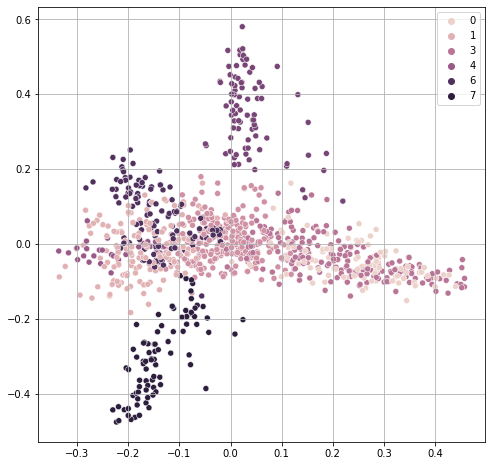

In [12]:
#consider only 8 categories
our_labels = ['crude', 'sugar', 'coffee', 'ship', 'gold', 'soy-meal','soy-oil','wheat']
docs_train = []
docs_labels = []
for i in range(len(train_labels)):
    if any(item in train_labels[i] for item in our_labels):
        docs_train.append(train_data[i])
        docs_labels.append(train_labels[i])


tf_idf = vec.fit_transform(docs_train)
print(tf_idf)
pca = PCA(60)
pca.fit(tf_idf.toarray())
docs_pca = pca.transform(tf_idf.toarray())
num_clusters = 8
km1 = KMeans(n_clusters=num_clusters)
clusters1 = km1.fit_predict(tf_idf)

#visualising the k means

plt.figure(figsize = (8,8))
plt.grid()
sns.scatterplot(docs_pca[:, 0], docs_pca[:, 1], hue = clusters1)
plt.show()

/Users/IMamazing/opt/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


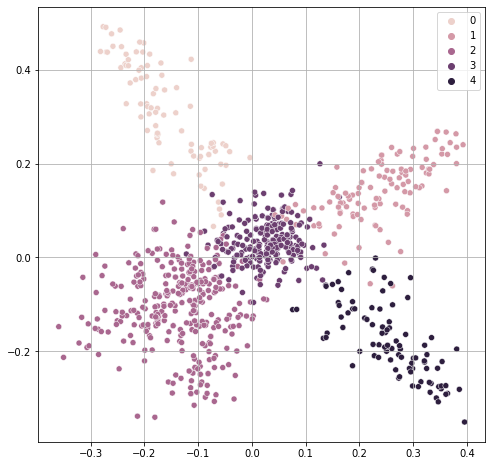

In [13]:
#consider only 5 categories
our_labels2 = ['crude', 'sugar', 'coffee', 'ship', 'gold']
docs_train2 = []
docs_labels2 = []
for i in range(len(train_labels)):
    if any(item in train_labels[i] for item in our_labels2):
        docs_train2.append(train_data[i])
        docs_labels2.append(train_labels[i])

tf_idf2 = vec.fit_transform(docs_train2)

pca = PCA(60)
pca.fit(tf_idf2.toarray())
docs_pca = pca.transform(tf_idf2.toarray())
num_clusters = 5
km2 = KMeans(n_clusters=num_clusters)
clusters2 = km2.fit_predict(tf_idf2)

#visualising the k means

plt.figure(figsize = (8,8))
plt.grid()
sns.scatterplot(docs_pca[:, 0], docs_pca[:, 1], hue = clusters2)
plt.show()

In [14]:
km1.inertia_

885.151090054778

In [15]:
km2.inertia_

725.1806187639485

In [16]:
print(metrics.silhouette_score(tf_idf, clusters1, metric='euclidean'))

0.04891759104002802


In [17]:
print(metrics.silhouette_score(tf_idf2, clusters2, metric='euclidean'))

0.046553960615371336
